In [8]:
%matplotlib inline

In [9]:
from clawpack.geoclaw import dtopotools
import numpy as np
from copy import copy
import matplotlib.pyplot as pl

In [10]:
cascadia = np.loadtxt('cascadia30.mshout',skiprows=1)
cascadia[:,[3,6,9,12]] = 1e3*abs(cascadia[:,[3,6,9,12]])

In [11]:
print('First triangular fault')
print(cascadia[0,1:4])
print(cascadia[0,4:7])
print(cascadia[0,7:10])

First triangular fault
[  -125.237101     46.418952  10805.356   ]
[ -125.36073     46.302805  8795.382   ]
[  -125.311684     46.526803  10094.313   ]


In [12]:
fault0 = dtopotools.Fault()
fault0.subfaults = []
rake = 90.
slip = 1.

J = int(np.floor(cascadia.shape[0]))

for j in range(J):
    subfault0 = dtopotools.SubFault()
    subfault0.set_corners([cascadia[j,4:7].tolist(),\
                               cascadia[j,7:10].tolist(),\
                               cascadia[j,10:13].tolist()])
    
    subfault0.rake = rake
    
    # earthquake with origin at (-125, 45, 6000)
    slip = 15.*np.exp(-np.sqrt((cascadia[j,7] + 125.)**2 + (cascadia[j,8] - 45.)**2))
    subfault0.slip = slip
    fault0.subfaults.append(subfault0)

In [13]:
lims = [cascadia[:,1].min(),cascadia[:,1].max(),cascadia[:,2].min(),cascadia[:,2].max()]

x0 = lims[0]-1.
x1 = lims[1]+1.

y0 = lims[2]-1.
y1 = lims[3]+1.

x = np.linspace(x0,x1,100)
y = np.linspace(y0,y1,100)

dtopo0 = fault0.create_dtopography(x,y,times=[0.]);

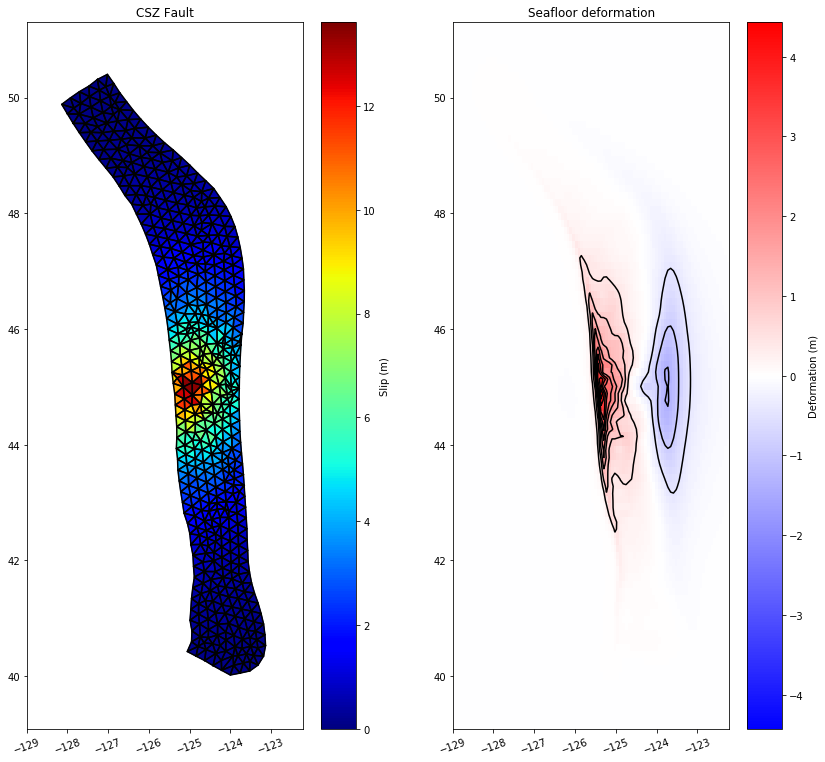

In [14]:
fig,(ax0,ax1) = pl.subplots(ncols=2,nrows=1,figsize=(14,13))
fault0.plot_subfaults(axes=ax0,slip_color=True);
ax0.set_xlim([x0,x1])
ax0.set_ylim([y0,y1])
ax0.set_title('CSZ Fault');
dtopo0.plot_dZ_colors(0.,axes=ax1);
# fig.tight_layout()
fig.savefig('CSZ_triangular.png')
